# Abalone Data Set

Data Set Characteristics: Multivariate

Attribute Characteristics: Categorical, Integer, Real

Number of Instances: 4177

Number of Attributes: 8

# Data Set Information
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. 

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).



# Attribute Information
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. 

Name / Data Type / Measurement Unit / Description 

Sex / nominal / -- / M, F, and I (infant) 

Length / continuous / mm / Longest shell measurement 

Diameter	/ continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous	/ grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried 

Rings / integer / -- / +1.5 gives the age in years 



# Data Exploration
Let's explore the date to determine the relevant information. First we import the Python packages.

In [8]:
%matplotlib inline

import os
import json
import time
import pickle
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Ingest Data from the UCI Machine Learning Repository

In [9]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

def fetch_data(fname='abalone.data'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'w') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

How do I know for certain if the fetch_data works here?

In [10]:
FEATURES  = [
    "Sex", 
    "Length", 
    "Diameter", 
    "Height", 
    "Whole Weight", 
    "Shucked Weight", 
    "Viscera Weight",
    "Shell Weight", 
    "Rings",
    ]

LABEL_MAP = {
    1: "1", 
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10",
    11: "11",
    12: "12",
    13: "13",
    14: "14",
    15: "15",
    16: "16",
    17: "17",
    18: "18",
    19: "19",
    20: "20",
    21: "21",
    22: "22",
    23: "23",
    24: "24",
    25: "25",
    26: "26",
    27: "27",
    28: "28",
    29: "29"
}

#  Read the data into a DataFrame
df = pd.read_csv(DATA, sep=',', header=None, names=FEATURES)
print(df.head())
# Convert class labels into text
for k,v in LABEL_MAP.items():
    df.ix[df.Count == k, 'label'] = v

#check label values
print df.head()

  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell Weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


AttributeError: 'DataFrame' object has no attribute 'Count'

I'm not sure what the AttributeError is trying to tell me here.

In [11]:
print df.describe()

            Length     Diameter       Height  Whole Weight  Shucked Weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera Weight  Shell Weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [17]:
# Determine shape of the data
print "{} instances with {} features\n".format(*df.shape)

# Determine frequency of each class
print df.groupby('Rings')['Rings'].count()

4177 instances with 9 features

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64


We can see ages of the Abalone fall on a bell curve, with the most frequent age being 8-10. 

# Data Visualization
Let's create some cool graphs.

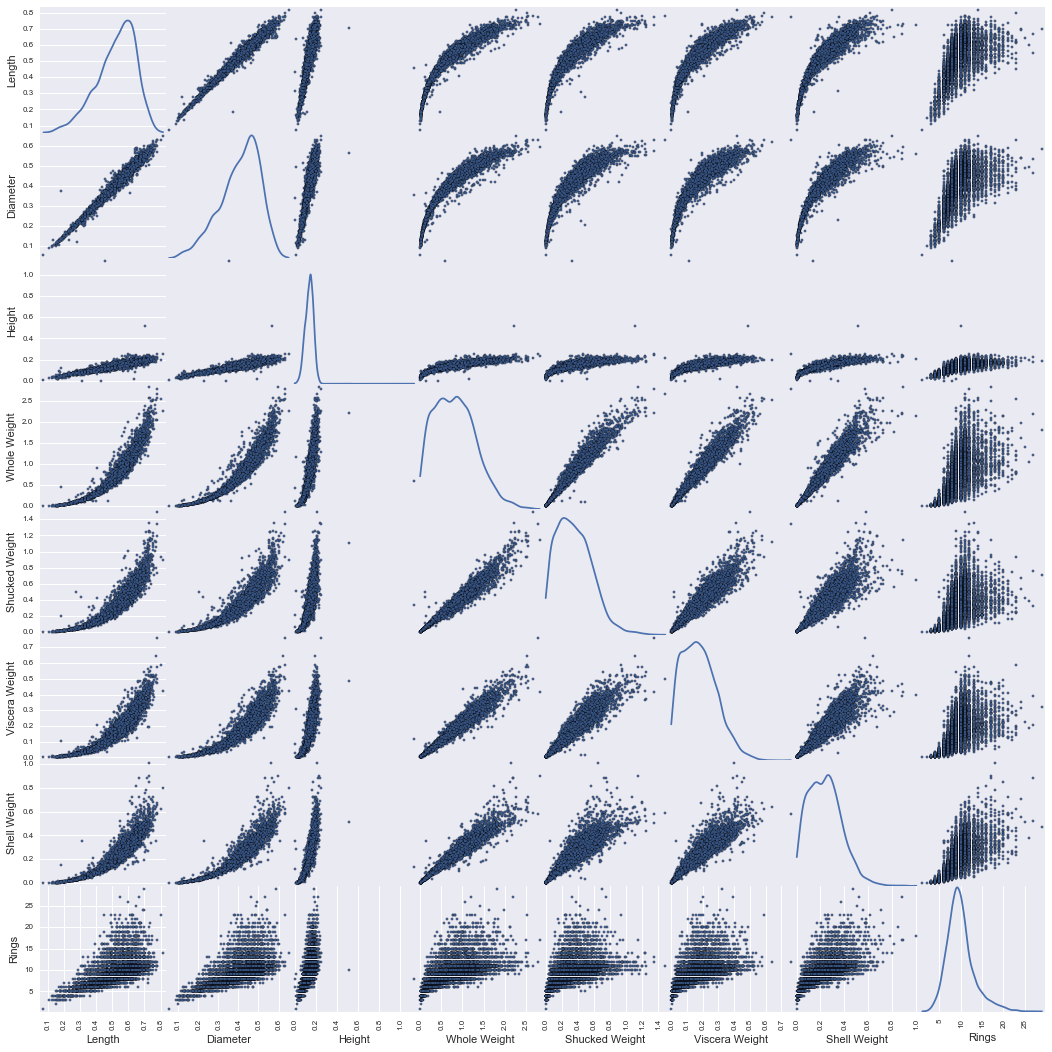

In [18]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=1, figsize=(18, 18), diagonal='kde')
plt.show()

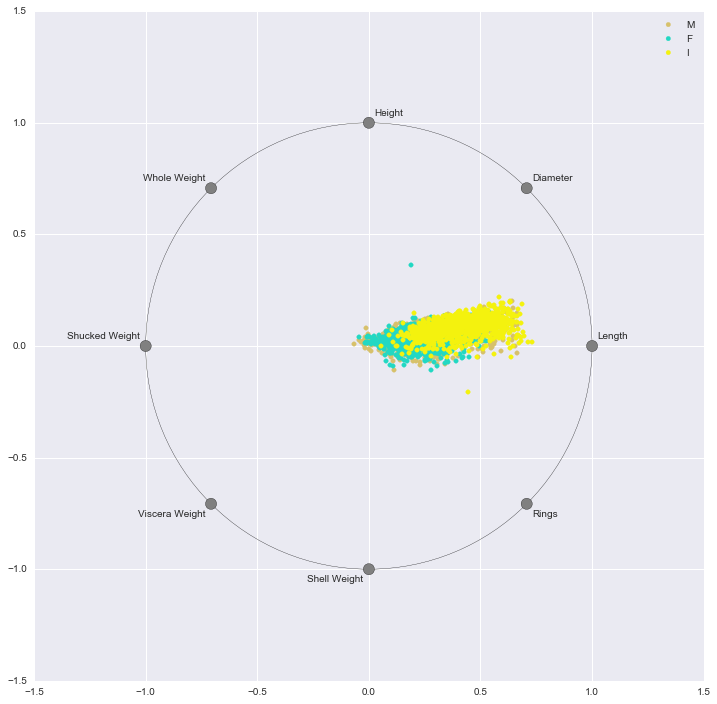

In [19]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'Sex')
plt.show()

# Data Extraction


In [24]:
import os 

print(os.getcwd())
print(os.path.abspath(DATA_DIR))

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print "- {}".format(name)

C:\Users\drewkwheatley\xbus\machine-learning\examples\drewkwheatley
C:\Users\drewkwheatley\xbus\machine-learning\examples\data\abalone


This is where I get lost. When looking at other examples, I notice that text should appear under this cell. But I can't get that text to appear here, and I think it's preventing me from taking the next step. For instance, in the Contraceptive notebook, I'm seeing

- cmc.txt
- dataset.csv
- meta.json
- README.MD
- wrangle.py

In [25]:
import json 


meta = {
    'target_names': list(data.rings.unique()),
    'feature_names': list(data.columns),
    'categorical_features': {
        column: list(data[column].unique())
        for column in data.columns
        if data[column].dtype == 'object'
    },
}

with open('data/meta.json', 'w') as f:
    json.dump(meta, f, indent=2)

NameError: name 'data' is not defined

I am using the same code Ben had in his census notebook to create a meta.json file. I swapped out data.income.unique with data.rings.unique. I am getting a NameError telling me "name 'data' is not defined"

In [6]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'abalone.data'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the text file.
    dataset = np.loadtxt(filenames['data'], delimiter=',')

    # Extract the target from the data
    data   = dataset[:, 0:-1]
    target = dataset[:, -1]

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print dataset.data.shape
print dataset.target.shape

IOError: [Errno 2] No such file or directory: 'C:\\Users\\drewkwheatley\\xbus\\machine-learning\\examples\\data\\abalone\\meta.json'

This time I used the code from the Contraceptive notebook. My efforts to create the meta.json file have failed. 

# Classification

Let's attempt to build a classifier with kNN, SVM, and Random Forest classifiers.

In [12]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    for train, test in KFold(dataset.data.shape[0], n_folds=12, shuffle=True):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print "Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start)
    print "Validation scores are as follows:\n"
    print pd.DataFrame(scores).mean()
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'w') as f:
        pickle.dump(estimator, f)

    print "\nFitted model written to:\n{}".format(os.path.abspath(outpath))

In [14]:
# Perform SVC Classification
fit_and_evaluate(dataset, SVC, "Abalone SVM Classifier", )

NameError: name 'dataset' is not defined

I am using the same code from the Contraceptive notebook. I'm not sure what I'm doing wrong here.

In [26]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "Contraception Method kNN Classifier", n_neighbors=12)

NameError: name 'dataset' is not defined

In [27]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "Contraception Method Random Forest Classifier")


NameError: name 'dataset' is not defined